In [1]:
import os, glob
import matplotlib.pyplot as plt

from nems0 import db, recording
import nems0.epoch as ep
from nems_lbhb import baphy_experiment

[numexpr.utils INFO] Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[numexpr.utils INFO] NumExpr defaulting to 8 threads.


In [2]:
basepath = '/auto/users/svd/projects/synthesis/OLP_synth_data'
filelist = glob.glob(os.path.join(basepath,'*'))

In [4]:
filepath = filelist[0]
print(filepath)

/auto/users/svd/projects/synthesis/OLP_synth_data/CLT027c_8608f652f7300566e229857fe22377058f96ace9.tgz


In [5]:
rec = recording.load_recording(filepath)

In [6]:
resp=rec['resp'].rasterize()
stim=rec['stim'].rasterize()
resp.epochs

,name,start,end
0,PASSIVE_EXPERIMENT,0.00,1689.410
1,FILE_CLT027c12_p_OLP,0.00,1689.410
2,TRIAL,0.00,10.101
3,BAPHYTRIAL1_FILE1,0.00,10.101
4,STIM_27Chainsaw-0-1-1-A_01FightSqueak-0-1-1-A,0.00,2.000
...,...,...,...
3397,PostStimSilence,1686.81,1687.310
3398,STIM_08Waterfall-0-1-1-T_null,1687.31,1689.310
3399,REFERENCE,1687.31,1689.310
3400,PreStimSilence,1687.31,1687.810


In [11]:
stim_epochs = ep.epoch_names_matching(resp.epochs,"^STIM_")
print(stim_epochs)

['STIM_08Waterfall-0-1-1-A_01FightSqueak-0-1-1-A', 'STIM_08Waterfall-0-1-1-A_34Castinets-0-1-1-A', 'STIM_08Waterfall-0-1-1-A_38ManA-0-1-1-A', 'STIM_08Waterfall-0-1-1-A_null', 'STIM_08Waterfall-0-1-1-C_01FightSqueak-0-1-1-C', 'STIM_08Waterfall-0-1-1-C_34Castinets-0-1-1-C', 'STIM_08Waterfall-0-1-1-C_38ManA-0-1-1-C', 'STIM_08Waterfall-0-1-1-C_null', 'STIM_08Waterfall-0-1-1-M_01FightSqueak-0-1-1-M', 'STIM_08Waterfall-0-1-1-M_34Castinets-0-1-1-M', 'STIM_08Waterfall-0-1-1-M_38ManA-0-1-1-M', 'STIM_08Waterfall-0-1-1-M_null', 'STIM_08Waterfall-0-1-1-N_01FightSqueak-0-1-1-N', 'STIM_08Waterfall-0-1-1-N_34Castinets-0-1-1-N', 'STIM_08Waterfall-0-1-1-N_38ManA-0-1-1-N', 'STIM_08Waterfall-0-1-1-N_null', 'STIM_08Waterfall-0-1-1-S_01FightSqueak-0-1-1-S', 'STIM_08Waterfall-0-1-1-S_34Castinets-0-1-1-S', 'STIM_08Waterfall-0-1-1-S_38ManA-0-1-1-S', 'STIM_08Waterfall-0-1-1-S_null', 'STIM_08Waterfall-0-1-1-T_01FightSqueak-0-1-1-T', 'STIM_08Waterfall-0-1-1-T_34Castinets-0-1-1-T', 'STIM_08Waterfall-0-1-1-T_38Man

In [24]:
e1 = 'STIM_null_01FightSqueak-0-1-1-A'
e2 = 'STIM_null_01FightSqueak-0-1-1-S'
e3 = 'STIM_null_01FightSqueak-0-1-1-C'
r1 = resp.extract_epoch(e1)
s1 = stim.extract_epoch(e1)[0]  # only need one copy of the stimulus spectrogram
r2 = resp.extract_epoch(e2)
s2 = stim.extract_epoch(e2)[0]  # only need one copy of the stimulus spectrogram
r3 = resp.extract_epoch(e3)
s3 = stim.extract_epoch(e3)[0]  # only need one copy of the stimulus spectrogram
r1.shape, s1.shape


((10, 30, 200), (32, 200))

Text(0, 0.5, 'spikes/sec')

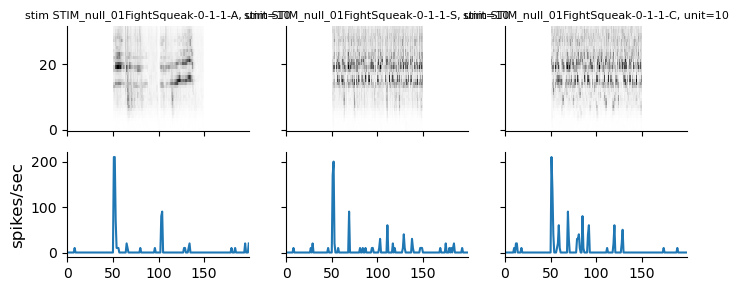

In [27]:
ri = 10
fs = resp.fs
f,ax = plt.subplots(2,3, figsize=(8,3), 
                    sharex=True, sharey='row')
ax[0,0].imshow(s1, origin='lower', cmap='gray_r')
ax[0,0].set_title(f"stim {e1}, unit={ri}", fontsize=8)
ax[0,1].imshow(s2, origin='lower', cmap='gray_r')
ax[0,1].set_title(f"stim {e2}, unit={ri}", fontsize=8);
ax[0,2].imshow(s3, origin='lower', cmap='gray_r')
ax[0,2].set_title(f"stim {e3}, unit={ri}", fontsize=8);

ax[1,0].plot(r1[:,ri,:].mean(axis=0)*fs)
ax[1,1].plot(r2[:,ri,:].mean(axis=0)*fs)
ax[1,2].plot(r3[:,ri,:].mean(axis=0)*fs)
ax[1,0].set_ylabel('spikes/sec')